‘Stock_File_1’, a stock trend forecasting company has just employed you as a Data Scientist. As a first task in your new job, your manager has provided you with a company’s stock data and asked you to check the quality of the data for the next step of analysis. Following are the additional description and information about the data which your manager has shared with you.

a)	The data set contains six variables namely-

i.	Date

ii.	Open

iii.	High

iv.	Low

v.	Close

vi.	Volume

b)	Typically, the stock market opens at 9:15 hours and closes at 15:30 hours. Each stock is defined by an opening price and a closing price which are the prices it opens and closes with. Within the operating hours, the stock price touches a maximum and minimum which are the highest and lowest prices achieved by the stock in the working hours of the stock market. You have access to ten years of monthly stock price data with the Open, High, Low and Close price and the number of stocks traded for each day given by the feature Volume. On some days when there is no trading, the parameters Open, High, Low and Close remain constant and Volume is zero.

Furthermore, your manager also claims that the model prediction is too bad since the data is polluted. Try to impress your new boss by preprocessing the data and by giving a proper rationale behind the steps you would follow. The two datasets should be merged before preprocessing. 


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt


In [93]:
df1 = pd.read_csv('Stock_File_1.csv')
df1.head()

,Date,Open,High,Low,Close,Volume
0,1-Jun-06,471.60,474.00,442.0,444.42,21900
1,12-Jun-06,454.00,464.00,440.0,446.17,8400
2,22-Jun-06,451.16,464.20,447.6,460.26,19400
3,3-Jul-06,495.10,509.68,493.0,498.97,9100
4,13-Jul-06,518.00,526.40,517.0,521.66,6800


In [94]:
df2 = pd.read_csv('Stock_File_2.txt')
df2.head()

,Date,Open,High,Low,Close,Volume
0,3-Jan-11,798.0,824.95,796.00,810.55,17600
1,13-Jan-11,748.1,768.00,NaN,752.85,13000
2,24-Jan-11,741.0,626.01,732.55,NaN,8700
3,1-Feb-11,753.0,753.00,712.10,717.25,23700
4,11-Feb-11,647.9,654.55,626.35,642.40,12800


merging two dataframes

In [95]:
df3 = pd.concat((df1,df2),axis=0,ignore_index=True)
df3


,Date,Open,High,Low,Close,Volume
0,1-Jun-06,471.60,474.00,442.00,444.42,21900
1,12-Jun-06,454.00,464.00,440.00,446.17,8400
2,22-Jun-06,451.16,464.20,447.60,460.26,19400
3,3-Jul-06,495.10,509.68,493.00,498.97,9100
4,13-Jul-06,518.00,526.40,517.00,521.66,6800
...,...,...,...,...,...,...
364,11-Jul-16,1265.50,1287.00,NaN,1276.40,11800
365,21-Jul-16,1301.00,1322.10,1261.00,1270.55,36800
366,1-Aug-16,1279.65,NaN,1247.40,1250.65,4600
367,11-Aug-16,1180.05,683.00,1171.15,1191.35,4800


Data cleansing

In [96]:
df3.isnull().sum()

Date       0
Open       7
High      16
Low       13
Close     14
Volume     0
dtype: int64

In [97]:
# Replacing null values with MEAN

open_mean = df3['Open'].mean()
df3['Open'].fillna(open_mean,inplace = True) 

close_mean = df3['Close'].mean()
df3['Close'].fillna(close_mean,inplace = True) 

high_mean = df3['High'].mean()
df3['High'].fillna(high_mean,inplace = True) 

low_mean = df3['Low'].mean()
df3['Low'].fillna(low_mean,inplace = True) 


In [98]:
df3.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [99]:
# converting date from object to date format

df3['Date'] = pd.to_datetime(df3['Date'])

In [100]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    369 non-null    datetime64[ns]
 1   Open    369 non-null    float64       
 2   High    369 non-null    float64       
 3   Low     369 non-null    float64       
 4   Close   369 non-null    float64       
 5   Volume  369 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 17.4+ KB


In [101]:
df3.head()

,Date,Open,High,Low,Close,Volume
0,2006-06-01,471.60,474.00,442.0,444.42,21900
1,2006-06-12,454.00,464.00,440.0,446.17,8400
2,2006-06-22,451.16,464.20,447.6,460.26,19400
3,2006-07-03,495.10,509.68,493.0,498.97,9100
4,2006-07-13,518.00,526.40,517.0,521.66,6800


In [102]:
#finding if any values ofLow are higher than values in High column

df3.loc[(df3.High<df3.Low) , ['High','Low']]

,High,Low
12,592.000000,856.357472
14,667.000000,674.140000
24,551.020000,722.800000
32,642.000000,772.000000
45,493.000000,1131.000000
52,644.000000,1500.000000
53,709.600000,1453.000000
54,387.600000,1558.000000
73,858.892918,945.000000
86,678.000000,856.357472


In [103]:
#swapping High and Low columns values where HIGH<LOW

df3.loc[(df3.High<df3.Low) , ['High','Low']] = df3.loc[(df3.High<df3.Low) , ['Low','High']].values

In [104]:
# finding and replacing all 'zero' values in Volume column by 0
df3.loc[df3['Volume'] == 'zero',['Volume']]

,Volume
103,zero
105,zero
119,zero
123,zero
129,zero
213,zero
249,zero
285,zero
321,zero
338,zero


In [105]:
df3.Volume = df3.Volume.replace('zero',0)


In [106]:
df3.loc[df3['Volume'] == 'zero',['Volume']]

,Volume


In [110]:
df3['Volume'] = df3.Volume.astype(float)

Plotting of differnt graphs 

Text(0, 0.5, 'Price')

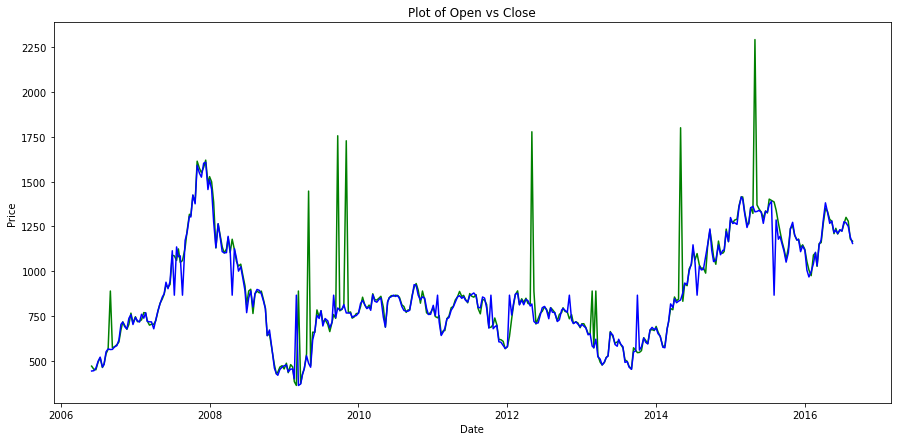

In [120]:
# plot for Open and Close values 

plt.figure(figsize=(15,7))
plt.plot(df3.Date,df3.Open,label='Open',color='green')
plt.plot(df3.Date,df3.Close,color='blue',label='Close')
plt.title("Plot of Open vs Close")
plt.xlabel("Date")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

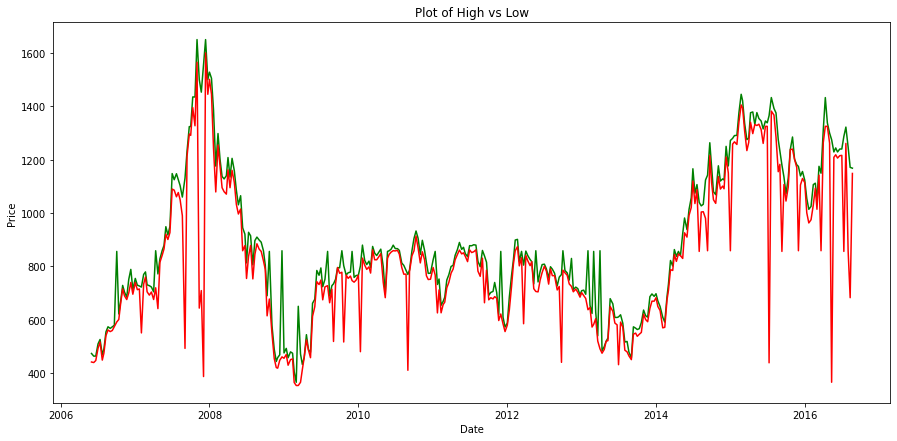

In [108]:
plt.figure(figsize=(15,7))
plt.plot(df3.Date,df3.High,color='green',label='High')
plt.plot(df3.Date,df3.Low,color='red',label='Low')
plt.title("Plot of High vs Low")
plt.xlabel("Date")
plt.ylabel("Price")

Text(0, 0.5, 'Volume count')

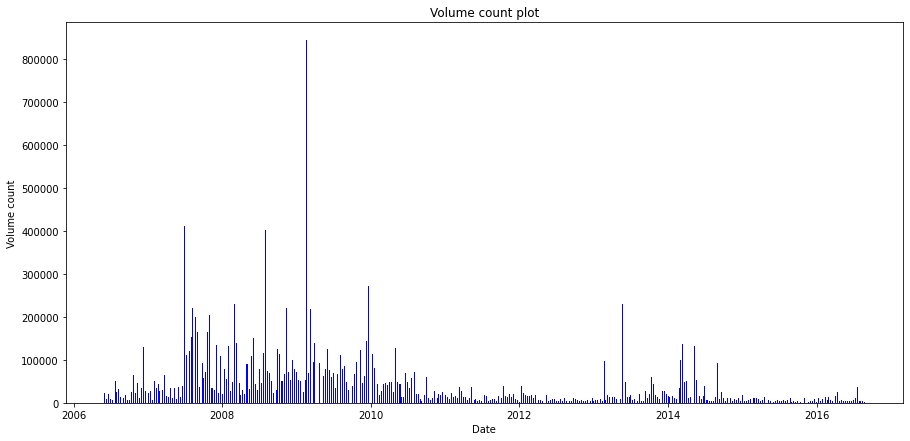

In [126]:
# plotting volume count across different dates

plt.figure(figsize=(15,7))
plt.bar(df3.Date,df3.Volume,color='blue',label='Volume',width = 5)
plt.title("Volume count plot")
plt.xlabel("Date")
plt.ylabel("Volume count")